In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
train_data = pd.read_csv('./Dataset/sign_mnist_train/sign_mnist_train.csv')
print(train_data.head())
print(train_data.shape)

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

In [4]:
input_shape = (28, 28, 1)

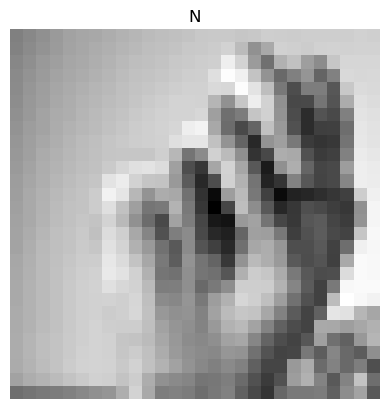

In [5]:
# display random image

import random
import matplotlib.pyplot as plt

def display_random_image():
    random_index = random.randint(0, train_data.shape[0])
    image = train_data.iloc[random_index, 1:].values.reshape(input_shape)
    plt.imshow(image, cmap='gray')
    plt.title(chr(train_data.iloc[random_index, 0] + 65))
    plt.axis('off')
    plt.show()

display_random_image()

In [6]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

print(X_train.shape, y_train.shape)

(27455, 784) (27455,)


In [7]:
x_train = X_train.values.reshape(-1, 28, 28, 1)
print(x_train.shape)

(27455, 28, 28, 1)


In [8]:
model = None

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(26, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       7

In [10]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=16)

Epoch 1/5
1373/1373 [==============================] - 56s 39ms/step - loss: 0.8265 - accuracy: 0.7337 - val_loss: 0.2053 - val_accuracy: 0.9323
Epoch 2/5
1373/1373 [==============================] - 69s 50ms/step - loss: 0.1775 - accuracy: 0.9409 - val_loss: 0.0517 - val_accuracy: 0.9911
Epoch 3/5
1373/1373 [==============================] - 70s 51ms/step - loss: 0.1056 - accuracy: 0.9660 - val_loss: 0.0323 - val_accuracy: 0.9909
Epoch 4/5
1373/1373 [==============================] - 69s 51ms/step - loss: 0.0829 - accuracy: 0.9736 - val_loss: 0.0637 - val_accuracy: 0.9796
Epoch 5/5
1373/1373 [==============================] - 70s 51ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.9173 - val_accuracy: 0.7647


In [12]:
from tensorflow.keras.models import save_model
save_model(model, 'model.h5')

Text(0, 0.5, 'Accuracy')

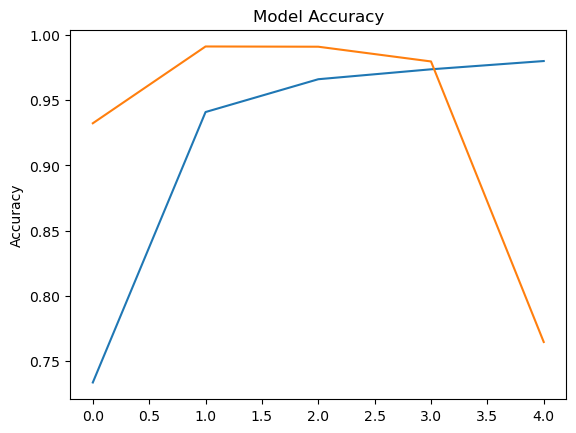

In [14]:
# plot the training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

In [15]:
test_data = pd.read_csv('./Dataset/sign_mnist_test/sign_mnist_test.csv')

y_test = test_data['label']
X_test = test_data.drop('label', axis=1)

x_test = X_test.values.reshape(-1, 28, 28, 1)

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

225/225 [==============================] - 6s 26ms/step - loss: 1.7238 - accuracy: 0.6874
Test loss: 1.7237944602966309, Test accuracy: 0.687395453453064


In [17]:
x_test = train_data
x_test = x_test.drop('label', axis=1)

x_test = x_test.values.reshape(-1, 28, 28, 1)

print(x_test.shape)

(27455, 28, 28, 1)


In [18]:
import os
import matplotlib.pyplot as plt

def save_images():
    for i in range(10):
        img = x_test[i]  # Assuming x_test contains the images
        label = chr(test_data.iloc[i, 0] + 65)  # Convert label to alphabet
        print(label)

        image_path = os.path.join('./images', f'{label}.jpg')
        os.makedirs(os.path.dirname(image_path), exist_ok=True)
        
        plt.imshow(img, cmap='gray')  # Assuming the images are grayscale
        plt.axis('off')  # Hide axes
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0)  # Save with original resolution and channels
        # plt.show()
        plt.close()  # Close the figure to release memory

save_images()


G
F
K
A
D
V
K
O
D
H


In [19]:
# # predict funtion

# import joblib
# import numpy as np
# from matplotlib import pyplot as plt
# def predict_image(image_path):
#     model = joblib.load('model.pkl')
#     image = plt.imread(image_path)
#     image = np.array(image)
#     print(image.shape)
#     image = image.reshape(-1, 28, 28, 1)
#     prediction = model.predict(image)
#     predicted_label = chr(np.argmax(prediction) + 65)
#     print(predicted_label)
#     return predicted_label


import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def save_images():
    for i in range(10):
        img = x_test[i].reshape(28, 28)  # Reshape to 28x28
        label = chr(test_data.iloc[i, 0] + 65)  # Convert label to alphabet
        print(label)

        image_path = os.path.join('./images', f'{label}.jpg')
        os.makedirs(os.path.dirname(image_path), exist_ok=True)
        
        # Convert to PIL Image and resize to 28x28
        img = Image.fromarray(img.astype('uint8'), mode='L').resize((28, 28))
        img.save(image_path)  # Save the image
        # Convert back to numpy array
        img = np.array(img)
        
        plt.imshow(img, cmap='gray')  # Assuming the images are grayscale
        plt.axis('off')  # Hide axes
        # plt.savefig(image_path, bbox_inches='tight', pad_inches=0)  # Save with fixed resolution
        plt.close()  # Close the figure to release memory

save_images()


G
F
K
A
D
V
K
O
D
H


In [20]:
# ! python --version

In [21]:
# ! pip install tensorflow keras

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

def predict_image(image_path):
    # Load the model from the .h5 file
    model = load_model('model.h5')
    
    # Load and preprocess the image
    image = plt.imread(image_path)
    image = np.array(image)
    print(image.shape)
    image = image.reshape(-1, 28, 28, 1)
    
    # Make predictions
    prediction = model.predict(image)
    
    # Convert prediction to label
    predicted_label = chr(np.argmax(prediction) + 65)
    print(predicted_label)
    return predicted_label


In [27]:
predict_image('./images/A.jpg')

(28, 28)
1/1 [==============================] - 0s 340ms/step
O


'O'

In [30]:
# ! pip install flask


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [2]:
import keras
print("Keras version:", keras.__version__)

Keras version: 2.12.0


In [3]:
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.12.0


In [4]:
! python --version

Python 3.11.3
